# 数据探索和分析

## 导入数据

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\Administrator\Desktop\data.csv',encoding='gbk')

In [3]:
df.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,2.018050e+31,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,2.018050e+31,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,2.018050e+31,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,2.018050e+31,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,2.018050e+31,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [4]:
df.shape  #4715行90列

(4715, 90)

In [5]:
df.columns  #查看数据特征

Index(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no',
       'low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_mont

## 删除无关特征

In [6]:
#删除与标签没有关系的特征
['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no','id_name','latest_query_time','source','loans_latest_time','first_transaction_time']
delete = ['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no','id_name','latest_query_time','source','loans_latest_time','first_transaction_time']
df = df.drop(delete,axis=1)

In [7]:
df.shape  #删除无关特征后，特征由90个变为81个

(4715, 81)

In [8]:
nan_rate = pd.DataFrame((df.shape[0]-df.count())/df.shape[0])  #查看缺失值比例

In [9]:
nan_rate[nan_rate.iloc[:,0]>0.5]  #student_feature缺失值达到63%，将其删除

,0
student_feature,0.630753


In [10]:
df = df.drop(['student_feature'],axis=1)

In [11]:
df.shape

(4715, 80)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715 entries, 0 to 4714
Data columns (total 80 columns):
low_volume_percent                            4713 non-null float64
middle_volume_percent                         4713 non-null float64
take_amount_in_later_12_month_highest         4715 non-null int64
trans_amount_increase_rate_lately             4712 non-null float64
trans_activity_month                          4713 non-null float64
trans_activity_day                            4713 non-null float64
transd_mcc                                    4713 non-null float64
trans_days_interval_filter                    4707 non-null float64
trans_days_interval                           4713 non-null float64
regional_mobility                             4713 non-null float64
repayment_capability                          4715 non-null int64
is_high_user                                  4715 non-null int64
number_of_trans_from_2011                     4713 non-null float64
historical_tran

## 使用众数进行缺失值填充

In [13]:
from sklearn.impute import SimpleImputer
for i in range(df.shape[1]):
    feature = df.iloc[:,i].values.reshape(-1,1)  #sklearn中特征矩阵必须是二维
    imp_mode = SimpleImputer(strategy='most_frequent')
    df.iloc[:,i] = imp_mode.fit_transform(feature)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715 entries, 0 to 4714
Data columns (total 80 columns):
low_volume_percent                            4715 non-null float64
middle_volume_percent                         4715 non-null float64
take_amount_in_later_12_month_highest         4715 non-null int64
trans_amount_increase_rate_lately             4715 non-null float64
trans_activity_month                          4715 non-null float64
trans_activity_day                            4715 non-null float64
transd_mcc                                    4715 non-null float64
trans_days_interval_filter                    4715 non-null float64
trans_days_interval                           4715 non-null float64
regional_mobility                             4715 non-null float64
repayment_capability                          4715 non-null int64
is_high_user                                  4715 non-null int64
number_of_trans_from_2011                     4715 non-null float64
historical_tran

## 处理分类型特征

In [15]:
from sklearn.preprocessing import OrdinalEncoder
df['reg_preference_for_trad'] = OrdinalEncoder().fit_transform(df['reg_preference_for_trad'].values.reshape(-1,1))

In [16]:
df.shape

(4715, 80)

In [17]:
#查找标签值对应的索引
for i in range(df.shape[1]):
    if df.columns[i] == 'status':
        print(i)

38


In [18]:
df.columns[38]

'status'

In [19]:
y = df.iloc[:,38]
X = df.drop(['status'],axis=1)

In [20]:
X.shape

(4715, 79)

# 特征工程

## 特征工程——方差过滤

In [21]:
from sklearn.feature_selection import VarianceThreshold
X_fsvar = VarianceThreshold().fit_transform(X) #实例化，不填写参数默认方差为0

In [22]:
X_fsvar.shape #方差过滤阈值为0时没有删除任何特征

(4715, 79)

## 特征工程——互信息法

In [23]:
#互信息法,它返回每个特征与目标之间的互信息量的估计，这个估计在[0,1]之间取值，0表示独立，1表示两个
#变量完全相关
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(X,y)

In [24]:
(result == 0).sum()

28

In [25]:
delete = []
for i in range(79):
    if result[i] == 0:
        delete.append(i)

In [26]:
X_ = X.drop(X.iloc[:,delete],axis=1)

In [27]:
X_.shape

(4715, 51)

In [28]:
X1 = X_.copy()
X2 = X_.copy()

## 计算IV值

In [29]:
#IV值用来衡量自变量预测能力。

In [30]:
import math
import numpy as np
from scipy import stats
from sklearn.utils.multiclass import type_of_target

def woe(X, y, event=1):  
    res_woe = []
    iv_dict = {}
    for feature in X.columns:
        x = X[feature].values
        # 1) 连续特征离散化
        if type_of_target(x) == 'continuous':
            x = discrete(x)
        # 2) 计算该特征的woe和iv
        # woe_dict, iv = woe_single_x(x, y, feature, event)
        woe_dict, iv = woe_single_x(x, y, feature, event)
        iv_dict[feature] = iv
        res_woe.append(woe_dict) 
        
    return iv_dict

In [31]:
def discrete(x):
    # 使用5等分离散化特征
    res = np.zeros(x.shape)
    for i in range(5):
        #stats.scoreatpercentile([1,2,3,4,5],50)    # 计算输入序列中给定百分位数的分数 返回值是3
        point1 = stats.scoreatpercentile(x, i * 20)
        point2 = stats.scoreatpercentile(x, (i + 1) * 20)
        x1 = x[np.where((x >= point1) & (x <= point2))]  #将x分到[0,20],[20,40],[40,60],[60,80],[80,100]5个区间进行离散化
        mask = np.in1d(x, x1) #测试一维数组的每个元素是否也存在于第二个数组中
        res[mask] = i + 1    # 将[i, i+1]块内的值标记成i+1
    return res

In [32]:
def woe_single_x(x, y, feature,event = 1):
    # event代表预测正例的标签
    event_total = (y == event).sum()  #预测为正例的数量
    non_event_total = y.shape[-1] - event_total #预测为负例的数量
    
    iv = 0
    woe_dict = {}
    for x1 in set(x):    # 遍历各个特征标签
        y1 = y.reindex(np.where(x == x1)[0])
        event_count = sum(y1 == event)  
        non_event_count = y1.shape[-1] - event_count
        
        rate_event = event_count / event_total  
        rate_non_event = non_event_count / non_event_total
        
        if rate_event == 0:
            rate_event = 0.0001
            # woei = -20
        elif rate_non_event == 0:
            rate_non_event = 0.0001
            # woei = 20
        woei = math.log(rate_event / rate_non_event) #表示第i组中正例/负例比值
        woe_dict[x1] = woei
        iv += (rate_event - rate_non_event) * woei
    return woe_dict, iv

In [33]:
import warnings
warnings.filterwarnings("ignore")
iv_dict = woe(X1,y)
iv = pd.DataFrame(sorted(iv_dict.items(), key = lambda x:x[1],reverse = True),columns=['Var','Iv'])
iv

,Var,Iv
0,historical_trans_amount,2.512028
1,trans_amount_3_month,2.340614
2,pawns_auctions_trusts_consume_last_6_month,1.979195
3,first_transaction_day,1.650536
4,consfin_avg_limit,1.392812
5,consume_mini_time_last_1_month,1.130859
6,loans_avg_limit,0.915704
7,max_cumulative_consume_later_1_month,0.899660
8,loans_score,0.878421
9,apply_score,0.708841


In [34]:
#IV值的取值范围是[0,正无穷]，<0.02,无用，0.02-0.1弱预测，0.1-0.3中等预测，0.3-0.5强预测
#>0.5可疑
threshold1 = 0.02
threshold2 = 0.5
data_index = []
for i in range(len(iv)):
    if (iv['Iv'][i]<threshold1)|(iv['Iv'][i]>threshold2):
        data_index.append(iv['Var'][i])
X1.drop(data_index,axis=1,inplace=True)

In [35]:
X1.shape  #特征由原来的52个变为30个

(4715, 30)

In [36]:
X1.columns

Index(['take_amount_in_later_12_month_highest', 'trans_days_interval',
       'number_of_trans_from_2011', 'top_trans_count_last_1_month',
       'avg_price_last_12_month', 'avg_price_top_last_12_valid_month',
       'trans_top_time_last_1_month', 'consume_top_time_last_6_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_fail_top_count_enum_last_12_month',
       'max_consume_count_later_6_month', 'trans_day_last_12_month',
       'apply_credibility', 'query_org_count', 'latest_one_month_apply',
       'loans_credibility_behavior', 'loans_overdue_count',
       'consfin_org_count_behavior', 'latest_six_month_loan',
       'history_suc_fee', 'latest_one_month_suc', 'latest_one_month_fail',
       'loans_credit_limit', 'loans_credibility_limit',
       'loans_org_count_current', 'loans_product_count',
       'consfin_credit_limit', 'consfin_org_count_current',
       'consfin_max_limit', 'latest_query_day'],
      dtype='object')

## 利用随机森林挑选特征值

In [37]:
#利用随机森林进行特征选择，主要用到了随机森林的重要属性，feature_imoportances，
#能够查看各个特征对模型的重要性。

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X1, y)
rfc_impc = pd.Series(rfc.feature_importances_, index = X1.columns).sort_values(ascending=False)
fea_gini = rfc_impc[:20].index
fea_gini

Index(['loans_overdue_count', 'avg_price_last_12_month',
       'latest_one_month_fail', 'number_of_trans_from_2011',
       'trans_days_interval', 'trans_fail_top_count_enum_last_12_month',
       'consume_top_time_last_6_month', 'latest_query_day',
       'consfin_credit_limit', 'trans_top_time_last_1_month',
       'trans_fail_top_count_enum_last_6_month', 'loans_credit_limit',
       'history_suc_fee', 'consfin_max_limit', 'apply_credibility',
       'trans_day_last_12_month', 'latest_six_month_loan', 'query_org_count',
       'take_amount_in_later_12_month_highest', 'loans_credibility_limit'],
      dtype='object')

In [39]:
finalX = X_.loc[:,fea_gini]
finalX.shape

(4715, 20)

In [40]:
## 样本不平衡处理

In [41]:
y[y==1].count()/y[y==0].count()

0.3349377123442809

In [42]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=420)
X,y = sm.fit_sample(finalX,y)

In [43]:
n_sample_ = X.shape[0]

In [44]:
pd.Series(y).value_counts()

1    3532
0    3532
dtype: int64

In [45]:
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

样本个数：7064; 1占50.00%; 0占50.00%


In [62]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

## 将数据分为训练集和测试集

In [63]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

### 逻辑回归

In [64]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR().fit(Xtrain,Ytrain)
#lr.score(Xtest,Ytest)
from sklearn import metrics
Ytest_pred = lr.predict(Xtest)
acc = metrics.accuracy_score(Ytest,Ytest_pred)
precision = metrics.precision_score(Ytest,Ytest_pred)
recall = metrics.recall_score(Ytest,Ytest_pred)
f1 = metrics.f1_score(Ytest,Ytest_pred)
auc= metrics.roc_auc_score(Ytest,Ytest_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

准确率:0.6840,精确率:0.7082,召回率:0.6339,f1-score:0.6690,auc:0.6843


### SVM

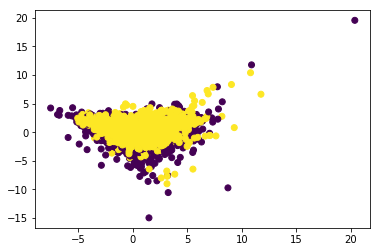

In [65]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
X_dr = PCA(2).fit_transform(X)
plt.scatter(X_dr[:,0],X_dr[:,1],c=y)  #20个特征降维进行可视化
plt.show()

In [66]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',gamma='auto',cache_size=5000).fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

0.7641509433962265

In [67]:
from sklearn import metrics
Ytest_pred = clf.predict(Xtest)
acc = metrics.accuracy_score(Ytest,Ytest_pred)
precision = metrics.precision_score(Ytest,Ytest_pred)
recall = metrics.recall_score(Ytest,Ytest_pred)
f1 = metrics.f1_score(Ytest,Ytest_pred)
auc= metrics.roc_auc_score(Ytest,Ytest_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

准确率:0.7642,精确率:0.7654,召回率:0.7669,f1-score:0.7661,auc:0.7641


### 决策树

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(Xtrain,Ytrain)
dtc.score(Xtest,Ytest)

0.7570754716981132

In [71]:
from sklearn import metrics
Ytest_pred = dtc.predict(Xtest)
acc = metrics.accuracy_score(Ytest,Ytest_pred)
precision = metrics.precision_score(Ytest,Ytest_pred)
recall = metrics.recall_score(Ytest,Ytest_pred)
f1 = metrics.f1_score(Ytest,Ytest_pred)
auc= metrics.roc_auc_score(Ytest,Ytest_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

准确率:0.7571,精确率:0.7516,召回率:0.7734,f1-score:0.7623,auc:0.7570


### 随机森林

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(Xtrain,Ytrain)
rfc.score(Xtest,Ytest)

0.8245283018867925

In [73]:
from sklearn import metrics

Ytest_pred = rfc.predict(Xtest)
acc = metrics.accuracy_score(Ytest,Ytest_pred)
precision = metrics.precision_score(Ytest,Ytest_pred)
recall = metrics.recall_score(Ytest,Ytest_pred)
f1 = metrics.f1_score(Ytest,Ytest_pred)
auc= metrics.roc_auc_score(Ytest,Ytest_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

准确率:0.8245,精确率:0.8566,召回率:0.7828,f1-score:0.8180,auc:0.8248


### XGBoost

In [75]:
from xgboost import XGBClassifier as XGBC
clf = XGBC().fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

0.8330188679245283

In [76]:
from sklearn import metrics

Ytest_pred = clf.predict(Xtest)
acc = metrics.accuracy_score(Ytest,Ytest_pred)
precision = metrics.precision_score(Ytest,Ytest_pred)
recall = metrics.recall_score(Ytest,Ytest_pred)
f1 = metrics.f1_score(Ytest,Ytest_pred)
auc= metrics.roc_auc_score(Ytest,Ytest_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

准确率:0.8330,精确率:0.8473,召回率:0.8155,f1-score:0.8311,auc:0.8332
